# Introdução

O objetivo da APS3 é realizar uma análise inferencial com base nas probabilidades calculadas pelo grupo. Para isso, escolhemos dois blocos econômicos para trabalharmos: O Mercosul e a União Europeia.

In [66]:
import pandas as pd

## Tratamento e Importação dos dados

In [67]:
PATH = 'data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4353266/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4353266.csv'
df = pd.read_csv(PATH, skiprows=4, sep=',', decimal='.', encoding='latin1')

# Utilizar apenas os dados disponíveis (entre 1960 e 2019)
for i in range(1960, 2000):
    del df[str(i)]
df.drop(['2020', '2021', 'Unnamed: 66'], axis=1, inplace=True)

df.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.894017,0.962371,0.964187,0.991013,1.036161,1.011151,...,1.021548,0.979352,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.036574,0.033785,0.045574,0.051518,0.041655,0.060419,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.530435,0.544612,0.502621,0.521609,0.507780,0.508247,...,0.472077,0.476789,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923


In [68]:
# Filtragem
df_ue = df[df['Country Code'].isin(['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE'])]

df_ms = df[df['Country Code'].isin(['ARG', 'BRA', 'PRY', 'URY', 'VEN', 'CHL', 'COL', 'PER', 'BOL', 'ECU', 'GUY', 'SUR'])]

In [69]:
df_ue.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
14,Austria,AUT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,7.929786,8.444109,8.583317,9.168344,9.275614,9.266114,...,8.365015,8.135474,7.723614,7.753700,7.260404,7.317159,7.288820,7.486162,7.133064,7.293984
17,Belgium,BEL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,11.439581,11.504321,10.727988,11.131315,10.941224,10.555782,...,9.794792,8.740505,8.577526,8.655478,8.041711,8.437852,8.314932,8.151096,8.196339,8.095584
21,Bulgaria,BGR,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.314454,5.767160,5.563239,6.164371,6.125549,6.265854,...,6.049544,6.755278,6.162153,5.458964,5.820925,6.207865,5.834882,6.201290,5.822034,5.610857
53,Cyprus,CYP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,7.558667,7.279172,7.339033,7.880736,7.699845,7.687390,...,7.100377,6.783205,6.255253,5.621288,5.909935,5.900152,6.169943,6.238954,6.054175,5.998795


In [70]:
df_ms.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9,Argentina,ARG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,3.587392,3.360371,3.117425,3.351724,3.672974,3.753639,...,4.099690,4.280989,4.264224,4.342115,4.209096,4.301914,4.201846,4.071308,3.975772,3.740650
28,Bolivia,BOL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.975260,0.938202,0.949350,1.019558,1.046417,1.088569,...,1.509663,1.626366,1.678603,1.777588,1.906316,1.909891,1.995137,2.032547,2.046130,1.940398
29,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.794550,1.802410,1.769881,1.709539,1.785372,1.782062,...,2.033226,2.117869,2.279272,2.421657,2.523232,2.373629,2.168575,2.196418,2.071855,2.057811
39,Chile,CHL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,3.286328,3.121272,3.131772,3.167263,3.432413,3.458629,...,4.087905,4.437266,4.506229,4.723555,4.311061,4.576124,4.749830,4.714020,4.624338,4.821118


# Sobre os blocos econômicos escolhidos

## Mercosul
O Mercosul é uma iniciativa de livre comércio de países sul-americanos. Conta, atualmente, com 5 países membros e 7 países associados. O bloco foi fundado em 1991 e, desde então, tem como objetivo a integração econômica e social dos países que o compõem. O maior critério para a criação e adesão de países é a proximidade geográfica e cultural de seus membros.

## União Europeia
A União Europeia é uma iniciativa que institui um mercado comum no continente europeu. O bloco foi fundado em 1993 e atualmente conta com 27 países membros. O objetivo da União Europeia é a integração econômica e social dos países que a compõem. Os critérios de entrada e permanência no bloco são mais complexos que os do Mercosul, envolvendo os critérios de Copenhague (questões políticas, econômicas e de acervo comunitário). Além do mercado comum, o bloco também possui uma política externa comum, uma moeda comum (Euro) e uma política de imigração comum.

In [71]:
# Países da União Europeia
df_ue['Country Name'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'Greece', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland',
       'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Sweden'],
      dtype=object)

In [72]:
# Países do Mercosul
df_ms['Country Name'].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Guyana', 'Peru', 'Paraguay', 'Suriname', 'Uruguay',
       'Venezuela, RB'], dtype=object)

# Métrica escolhida
Para a análise, o grupo escolheu trabalhar com o Delta de emissões de CO2 por pessoa entre 2000 e 2019. O Delta foi escolhido pois demonstra mais facilmente as variações de emissões de CO2 por pessoa entre os países, podendo ser facilmente comparado e analisado. Para calculá-lo, o grupo realizou a contagem de emissões de CO2 por pessoa em 2000 e em 2019, e então subtraiu o valor de 2000 do valor de 2019. O resultado foi o Delta apresentado a seguir.

Para o Status, o grupo utilizou a seguinte classificação:
- Delta maior ou igual a zero: Status Atrasado
- Delta menor que zero: Status Avançado

In [73]:
# Calcular o Delta de emissões de CO2 por país de 2000 até 2019
for country in df_ue['Country Name'].unique():
    df_ue.loc[df_ue['Country Name'] == country, 'Delta'] = df_ue.loc[df_ue['Country Name'] == country, '2019'].values[0] - df_ue.loc[df_ue['Country Name'] == country, '2000'].values[0]

for country in df_ms['Country Name'].unique():
    df_ms.loc[df_ms['Country Name'] == country, 'Delta'] = df_ms.loc[df_ms['Country Name'] == country, '2019'].values[0] - df_ms.loc[df_ms['Country Name'] == country, '2000'].values[0]

df_ue.head(4)

/tmp/ipykernel_10010/3508682445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ue.loc[df_ue['Country Name'] == country, 'Delta'] = df_ue.loc[df_ue['Country Name'] == country, '2019'].values[0] - df_ue.loc[df_ue['Country Name'] == country, '2000'].values[0]
/tmp/ipykernel_10010/3508682445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms.loc[df_ms['Country Name'] == country, 'Delta'] = df_ms.loc[df_ms['Country Name'] == country, '2019'].values[0] - df_ms.loc[df_ms['Country Name'] == country, 

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Delta
14,Austria,AUT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,7.929786,8.444109,8.583317,9.168344,9.275614,9.266114,...,8.135474,7.723614,7.753700,7.260404,7.317159,7.288820,7.486162,7.133064,7.293984,-0.635801
17,Belgium,BEL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,11.439581,11.504321,10.727988,11.131315,10.941224,10.555782,...,8.740505,8.577526,8.655478,8.041711,8.437852,8.314932,8.151096,8.196339,8.095584,-3.343997
21,Bulgaria,BGR,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.314454,5.767160,5.563239,6.164371,6.125549,6.265854,...,6.755278,6.162153,5.458964,5.820925,6.207865,5.834882,6.201290,5.822034,5.610857,0.296404
53,Cyprus,CYP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,7.558667,7.279172,7.339033,7.880736,7.699845,7.687390,...,6.783205,6.255253,5.621288,5.909935,5.900152,6.169943,6.238954,6.054175,5.998795,-1.559872


In [74]:
df_ms.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Delta
9,Argentina,ARG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,3.587392,3.360371,3.117425,3.351724,3.672974,3.753639,...,4.280989,4.264224,4.342115,4.209096,4.301914,4.201846,4.071308,3.975772,3.740650,0.153258
28,Bolivia,BOL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.975260,0.938202,0.949350,1.019558,1.046417,1.088569,...,1.626366,1.678603,1.777588,1.906316,1.909891,1.995137,2.032547,2.046130,1.940398,0.965138
29,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.794550,1.802410,1.769881,1.709539,1.785372,1.782062,...,2.117869,2.279272,2.421657,2.523232,2.373629,2.168575,2.196418,2.071855,2.057811,0.263261
39,Chile,CHL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,3.286328,3.121272,3.131772,3.167263,3.432413,3.458629,...,4.437266,4.506229,4.723555,4.311061,4.576124,4.749830,4.714020,4.624338,4.821118,1.534790


In [75]:
df_ue['Status'] = df_ue['Delta'].apply(lambda x: 'Atrasado' if x >= 0 else 'Avançado')
df_ms['Status'] = df_ms['Delta'].apply(lambda x: 'Atrasado' if x >= 0 else 'Avançado')

/tmp/ipykernel_10010/3716828161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ue['Status'] = df_ue['Delta'].apply(lambda x: 'Atrasado' if x >= 0 else 'Avançado')
/tmp/ipykernel_10010/3716828161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['Status'] = df_ms['Delta'].apply(lambda x: 'Atrasado' if x >= 0 else 'Avançado')


In [76]:
# concatenar os dois blocos
df_concat = pd.concat([df_ue, df_ms])
df_concat['Bloco'] = df_concat['Country Code'].apply(lambda x: 'UE' if x in ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE'] else 'Mercosul')
df_concat.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,Delta,Status,Bloco
14,Austria,AUT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,7.929786,8.444109,8.583317,9.168344,9.275614,9.266114,...,7.753700,7.260404,7.317159,7.288820,7.486162,7.133064,7.293984,-0.635801,Avançado,UE
17,Belgium,BEL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,11.439581,11.504321,10.727988,11.131315,10.941224,10.555782,...,8.655478,8.041711,8.437852,8.314932,8.151096,8.196339,8.095584,-3.343997,Avançado,UE
21,Bulgaria,BGR,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.314454,5.767160,5.563239,6.164371,6.125549,6.265854,...,5.458964,5.820925,6.207865,5.834882,6.201290,5.822034,5.610857,0.296404,Atrasado,UE
53,Cyprus,CYP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,7.558667,7.279172,7.339033,7.880736,7.699845,7.687390,...,5.621288,5.909935,5.900152,6.169943,6.238954,6.054175,5.998795,-1.559872,Avançado,UE
54,Czech Republic,CZE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,12.010653,12.011818,11.624103,12.043361,12.105402,11.750804,...,9.620257,9.264303,9.400668,9.627750,9.611647,9.492068,9.022786,-2.987867,Avançado,UE


In [77]:
# Contagem de países por Status
df_concat['Status'].value_counts()

Avançado    23
Atrasado    16
Name: Status, dtype: int64

In [78]:
# Contagem de países por Bloco e Status
df_concat.groupby(['Bloco', 'Status']).size()

Bloco     Status  
Mercosul  Atrasado    11
          Avançado     1
UE        Atrasado     5
          Avançado    22
dtype: int64

# Análise Exploratória

Text(0.5, 0, 'Bloco')

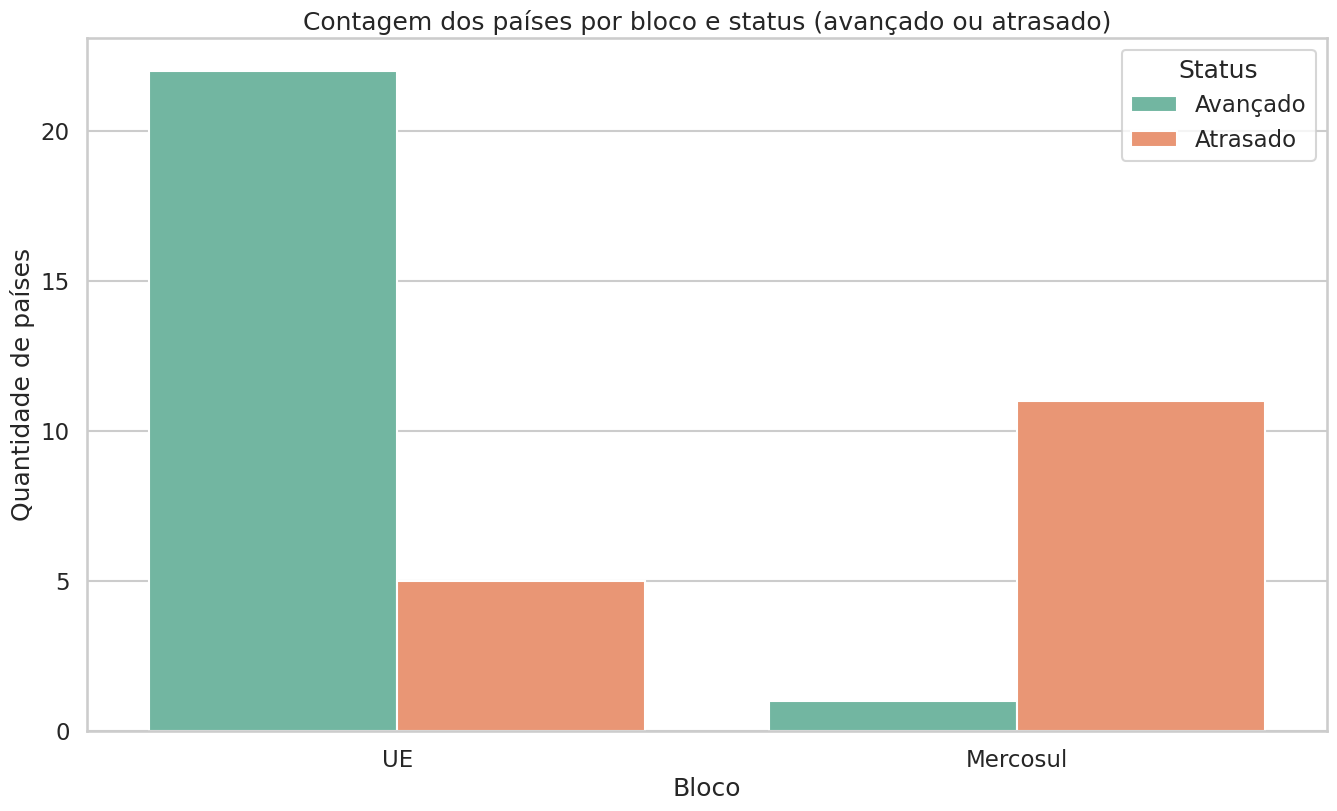

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 9))
sns.set_style('whitegrid')
sns.countplot(x='Bloco', hue='Status', data=df_concat, palette='Set2')
plt.title('Contagem dos países por bloco e status (avançado ou atrasado)')
plt.ylabel('Quantidade de países')
plt.xlabel('Bloco')

# Calculando as Probabilidades e Estatísticas

In [80]:
# P(Avançado | UE)
p_avancado_ue = df_concat[(df_concat['Bloco'] == 'UE') & (df_concat['Status'] == 'Avançado')].shape[0] / df_concat[df_concat['Bloco'] == 'UE'].shape[0]
# P(Atrasado | UE)
p_atrasado_ue = df_concat[(df_concat['Bloco'] == 'UE') & (df_concat['Status'] == 'Atrasado')].shape[0] / df_concat[df_concat['Bloco'] == 'UE'].shape[0]
print(f'A probabilidade de um país do bloco UE estar avançado em relação à métrica é de {p_avancado_ue*100:.2f}%.')
print(f'A probabilidade de um país do bloco UE estar atrasado em relação à métrica é de {p_atrasado_ue*100:.2f}%.')

A probabilidade de um país do bloco UE estar avançado em relação à métrica é de 81.48%.
A probabilidade de um país do bloco UE estar atrasado em relação à métrica é de 18.52%.


In [81]:
# P(Avançado | Mercosul)
p_avancado_ms = df_concat[(df_concat['Bloco'] == 'Mercosul') & (df_concat['Status'] == 'Avançado')].shape[0] / df_concat[df_concat['Bloco'] == 'Mercosul'].shape[0]
# P(Atrasado | Mercosul)
p_atrasado_ms = df_concat[(df_concat['Bloco'] == 'Mercosul') & (df_concat['Status'] == 'Atrasado')].shape[0] / df_concat[df_concat['Bloco'] == 'Mercosul'].shape[0]
print(f'A probabilidade de um país do bloco Mercosul estar avançado em relação à métrica é de {p_avancado_ms*100:.2f}%.')
print(f'A probabilidade de um país do bloco Mercosul estar atrasado em relação à métrica é de {p_atrasado_ms*100:.2f}%.')

A probabilidade de um país do bloco Mercosul estar avançado em relação à métrica é de 8.33%.
A probabilidade de um país do bloco Mercosul estar atrasado em relação à métrica é de 91.67%.


In [82]:
# P(Mercosul)
p_ms = df_concat[df_concat['Bloco'] == 'Mercosul'].shape[0] / df_concat.shape[0]
# P(UE)
p_ue = df_concat[df_concat['Bloco'] == 'UE'].shape[0] / df_concat.shape[0]
print(f'A probabilidade de um país escolhido ser do bloco Mercosul é de {p_ms*100:.2f}%.')
print(f'A probabilidade de um país escolhido ser do bloco UE é de {p_ue*100:.2f}%.')

A probabilidade de um país escolhido ser do bloco Mercosul é de 30.77%.
A probabilidade de um país escolhido ser do bloco UE é de 69.23%.


In [83]:
# P(Avançado)
p_avancado = df_concat[df_concat['Status'] == 'Avançado'].shape[0] / df_concat.shape[0]
# P(Atrasado)
p_atrasado = df_concat[df_concat['Status'] == 'Atrasado'].shape[0] / df_concat.shape[0]
print(f'A probabilidade de um país escolhido estar avançado em relação à métrica é de {p_avancado*100:.2f}%.')
print(f'A probabilidade de um país escolhido estar atrasado em relação à métrica é de {p_atrasado*100:.2f}%.')

A probabilidade de um país escolhido estar avançado em relação à métrica é de 58.97%.
A probabilidade de um país escolhido estar atrasado em relação à métrica é de 41.03%.


In [84]:
# P(Mercosul | Avançado) = P(Mercosul) * P(Avançado | Mercosul) / P(Avançado)
p_ms_avancado = (p_avancado_ms * p_ms) / p_avancado
print(f'De acordo com o Bayesiano calculado, a probabilidade de um país ser do Mercosul dado que ele está avançado em relação à métrica é de {p_ms_avancado*100:.1f}%.')

De acordo com o Bayesiano calculado, a probabilidade de um país ser do Mercosul dado que ele está avançado em relação à métrica é de 4.3%.


In [85]:
# P(Mercosul | Atrasado) = P(Mercosul) * P(Atrasado | Mercosul) / P(Atrasado)
p_ms_atrasado = (p_atrasado_ms * p_ms) / p_atrasado
print(f'De acordo com o Bayesiano calculado, a probabilidade de um país ser do Mercosul dado que ele está atrasado em relação à métrica é de {p_ms_atrasado*100:.1f}%.')

De acordo com o Bayesiano calculado, a probabilidade de um país ser do Mercosul dado que ele está atrasado em relação à métrica é de 68.8%.


In [86]:
# P(UE | Avançado) = P(UE) * P(Avançado | UE) / P(Avançado)
p_ue_avancado = (p_avancado_ue * p_ue) / p_avancado
print(f'De acordo com o Bayesiano calculado, a probabilidade de um país ser da UE dado que ele está avançado em relação à métrica é de {p_ue_avancado*100:.1f}%.')

De acordo com o Bayesiano calculado, a probabilidade de um país ser da UE dado que ele está avançado em relação à métrica é de 95.7%.


In [87]:
# P(UE | Atrasado) = P(UE) * P(Atrasado | UE) / P(Atrasado)
p_ue_atrasado = (p_atrasado_ue * p_ue) / p_atrasado
print(f'De acordo com o Bayesiano calculado, a probabilidade de um país ser da UE dado que ele está atrasado em relação à métrica é de {p_ue_atrasado*100:.1f}%.')

De acordo com o Bayesiano calculado, a probabilidade de um país ser da UE dado que ele está atrasado em relação à métrica é de 31.2%.


In [88]:
# Classificador Bayesiano
def classificador_bayesiano(pais):
    if df_concat[df_concat['Country Code'] == pais]['Status'].values[0] == 'Avançado':
        if p_ms_avancado > p_ue_avancado:
            return 'Mercosul'
        else:
            return 'UE'
    else:
        if p_ms_atrasado > p_ue_atrasado:
            return 'Mercosul'
        else:
            return 'UE'

# Classificador Bayesiano

Para realizar a classificação simples, o grupo elaborou uma função classificadora com base nas probabilidades calculadas anteriormente.

In [89]:
df_concat['Pred'] = df_concat['Country Code'].apply(classificador_bayesiano)
df_concat.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,Delta,Status,Bloco,Pred
14,Austria,AUT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,7.929786,8.444109,8.583317,9.168344,9.275614,9.266114,...,7.260404,7.317159,7.288820,7.486162,7.133064,7.293984,-0.635801,Avançado,UE,UE
17,Belgium,BEL,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,11.439581,11.504321,10.727988,11.131315,10.941224,10.555782,...,8.041711,8.437852,8.314932,8.151096,8.196339,8.095584,-3.343997,Avançado,UE,UE
21,Bulgaria,BGR,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.314454,5.767160,5.563239,6.164371,6.125549,6.265854,...,5.820925,6.207865,5.834882,6.201290,5.822034,5.610857,0.296404,Atrasado,UE,Mercosul
53,Cyprus,CYP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,7.558667,7.279172,7.339033,7.880736,7.699845,7.687390,...,5.909935,5.900152,6.169943,6.238954,6.054175,5.998795,-1.559872,Avançado,UE,UE
54,Czech Republic,CZE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,12.010653,12.011818,11.624103,12.043361,12.105402,11.750804,...,9.264303,9.400668,9.627750,9.611647,9.492068,9.022786,-2.987867,Avançado,UE,UE


In [90]:
# Avaliando o classificador
df_concat['Pred'].value_counts()

UE          23
Mercosul    16
Name: Pred, dtype: int64

In [91]:
# Avaliando a contagem de um bloco previsto em relação ao bloco real dos países
df_concat.groupby(['Bloco', 'Pred']).size()

Bloco     Pred    
Mercosul  Mercosul    11
          UE           1
UE        Mercosul     5
          UE          22
dtype: int64

In [92]:
# Acurácia do classificador
from sklearn.metrics import accuracy_score
acc = accuracy_score(df_concat['Bloco'], df_concat['Pred'])
print(f'A acurácia do classificador é de {acc*100:.2f}%.')

# Acurácia por bloco
df_concat.groupby(['Bloco', 'Pred']).size() / df_concat.groupby(['Bloco']).size()

A acurácia do classificador é de 84.62%.


Bloco     Pred    
Mercosul  Mercosul    0.916667
          UE          0.083333
UE        Mercosul    0.185185
          UE          0.814815
dtype: float64

# Conclusão

É possível observar, pela matriz elaborada, que apenas um país da Mercosul foi erroneamente calculado como sendo da União Europeia, enquanto 5 países da União Europeia foram erroneamente calculados como sendo do Mercosul. A acurácia calculada para o classificador foi de quase 85%, o que é um resultado satisfatório para um classificador tão simples. A acurácia é medida contando os valores previstos como verdadeiros, divididos pelo total de valores previstos; portanto, em 85% dos casos, o classificador previu corretamente o bloco econômico ao qual o país pertence. Como pode ser visto em seguida, a acurácia por bloco é de aproximadamente 92% para o Mercosul, e 81% para a União Europeia. Isso provavelmente se dá por conta de haver mais países na União Europeia do que no Mercosul, e que tais países são mais diversos em relação à métrica. O Mercosul possui menos países, e são mais concentrados em "Atrasados" no Status, como pode ser visto em nossa Análise Exploratória.

Levando em consideração o que foi obtido, o grupo pode concluir que, para essa situação, a métrica escolhida é um bom preditor para o bloco econômico.


## Alterações na APS2

- Retiramos a afirmação de uma correlação negativa significar que as variáveis são inversamente proporcionais.
- Separamos os gráficos, para uma melhor compreensão do eixo Y, um está em %, enquanto o outro está em toneladas
- Mudamos a ordem de apresentação dos resultados, estando as conclusões por último, após os gráficos e os valores de covariância e correlação.

## Referências

- https://www.mercosur.int/pt-br/quem-somos/paises-do-mercosul/
- https://www.mercosur.int/pt-br/quem-somos/em-poucas-palavras/
- https://european-union.europa.eu/principles-countries-history/country-profiles_pt
- https://www.generaltradeways.com.br/es_ES/blog/o-que-e-o-mercosul-e-quais-os-seus-beneficios/
- https://pt.wikipedia.org/wiki/Uni%C3%A3o_Europeia
- https://pt.wikipedia.org/wiki/Crit%C3%A9rios_de_Copenhaga
- https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c